# Pandas for Timeseries Data

This notebook documents the best practices for dealing with timeseries data with Pandas from a practical perspective. The focus will be on dealing with existing time related data instead of generating timeseries. Previous knowledge on Pandas is not required.

#### CONTENT

1.  [Load Data](#Load-data)
2.  [Index Methods](#Pandas-index-methods)
3.  [Data to Timeseries](#Convert-year,-month-in-different-columns-into-timeseries)
4.  [Sort Timeseries](#Sort-by-time)
5.  [Unpack Datetime](#Unpack-datetime-objects)
6.  [Datetime Boolean](#Datetime-boolean)
7.  [Built-in Plot](#Plot)
8.  [Datetime Index](#Datetime-Index)
9.  [Datetime Slicing](#Datetime-Slicing)
10. [Offset Alias - Frequency](#Offset-Alias---Frequency)
11. [Shift Datetime](#Shift-datetime)
12. [Converting Frequency](#Converting-Frequency)
13. [Converting Frequency - Resampling](#Converting-Frequency---Resampling)
14. [Other](#Other)

In [1]:
import pandas as pd
%matplotlib inline
figsize = (8,4)
pd.__version__

'0.19.2'

### Load data

The example file is in .xlsx Excel format, there are plently of builtin methods to load files in other format, simply use `pd.read_ + tab` to see other options

In [2]:
xlsx = pd.ExcelFile('ExampleData.xlsx')

#### Get all excel sheet names in a list

In [3]:
xlsx.sheet_names

['Data', 'Sheet1']

#### Read xlsx sheet into pandas dataframe

In [4]:
df = pd.read_excel(xlsx, sheetname='Data')

df.head(5) # Show first 5 rows of the dataframe

,BRAND,AREA,YEAR,MONTH,DEMAND
0,Brand_A,ASTRL,2016,1,21
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872


### Pandas index methods

#### Basic index methods

In [5]:
df.ix[0,1] # By index numbers similar to matrix index

'ASTRL'

In [6]:
df.ix[0:4,:] # Range can be passed as well

,BRAND,AREA,YEAR,MONTH,DEMAND
0,Brand_A,ASTRL,2016,1,21
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872


In [7]:
df['BRAND'].head(5) # Index by column name

0    Brand_A
1    Brand_A
2    Brand_A
3    Brand_A
4    Brand_A
Name: BRAND, dtype: object

#### Index with conditions

In [8]:
df.loc[df['DEMAND']==1296]

,BRAND,AREA,YEAR,MONTH,DEMAND
2,Brand_A,ASTRL,2016,5,1296
19,Brand_B VISTA,MEXICO,2015,2,1296


Use `&` in `df.loc[]` to check boolean for both True 

In [9]:
df.loc[(df['AREA']=='ASTRL') & (df['DEMAND'] > 500)] # Get all ASTRL data if demand is greater than 500

,BRAND,AREA,YEAR,MONTH,DEMAND
1,Brand_A,ASTRL,2016,4,1666
2,Brand_A,ASTRL,2016,5,1296
3,Brand_A,ASTRL,2016,6,978
4,Brand_A,ASTRL,2016,7,872
5,Brand_A,ASTRL,2016,8,746


Use `|` in `df.loc[]` to check boolean for any is True

In [10]:
# Get all data for Nov. or Dec. if demand is larger than 30000

df.loc[(df['DEMAND']>30000) & ((df['MONTH']==12) | (df['MONTH']==11))] 

,BRAND,AREA,YEAR,MONTH,DEMAND
65,Brand_B VISTA,MUESED,2015,11,110066
66,Brand_B VISTA,MUESED,2015,12,78656
87,Brand_B VISTA,NORAME,2015,11,45372
88,Brand_B VISTA,NORAME,2015,12,43946


Another convenient method for looking up strings in the dataframe is `df[].str.contains()`, this method will return a new dataframe of booleans for each row of the dataframe, simplely warp it with the original dataframe to get data contains a certian string.

In [11]:
df['BRAND'].str.contains("_B VISTA").head(5)

0    False
1    False
2    False
3    False
4    False
Name: BRAND, dtype: bool

In [12]:
df[df['BRAND'].str.contains("_B VISTA")].head(5)

,BRAND,AREA,YEAR,MONTH,DEMAND
8,Brand_B VISTA,LTFDUB,2015,4,255
9,Brand_B VISTA,LTFDUB,2015,7,112
10,Brand_B VISTA,MENA,2015,11,806
11,Brand_B VISTA,MENA,2015,12,276
12,Brand_B VISTA,MENA,2016,2,7833


### Convert year, month in different columns into timeseries

Simplely use `pd.to_datetime()` to convert year, month, date from string to datetime objects. Original year and month loaded form xlsx file are stored as `numpy.int64`, so we can easily convert them into string by using `df[].astype(str)`.

In [13]:
type(df['YEAR'][0])

numpy.int64

In [14]:
pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str)).head(5)

0   2016-01-01
1   2016-04-01
2   2016-05-01
3   2016-06-01
4   2016-07-01
dtype: datetime64[ns]

We can add converted datatime object and store them in the dataframe by creating a new column and pass the output of previous step to it.

In [15]:
df['DATETIME'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))

df.head(5)

,BRAND,AREA,YEAR,MONTH,DEMAND,DATETIME
0,Brand_A,ASTRL,2016,1,21,2016-01-01
1,Brand_A,ASTRL,2016,4,1666,2016-04-01
2,Brand_A,ASTRL,2016,5,1296,2016-05-01
3,Brand_A,ASTRL,2016,6,978,2016-06-01
4,Brand_A,ASTRL,2016,7,872,2016-07-01


### Sort by time

To sort data in time sequence, simplely use `df.sort_values()` to reorder the dataframe by column name. Below is an example of combining index methods with sort methods to get *Brand_A* in *ASTRL* in time order.

In [16]:
df_sorted = df.loc[(df['BRAND']=='Brand_A') & (df['AREA']=='ASTRL')].sort_values('DATETIME', ascending=True)

df_sorted

,BRAND,AREA,YEAR,MONTH,DEMAND,DATETIME
0,Brand_A,ASTRL,2016,1,21,2016-01-01
1,Brand_A,ASTRL,2016,4,1666,2016-04-01
2,Brand_A,ASTRL,2016,5,1296,2016-05-01
3,Brand_A,ASTRL,2016,6,978,2016-06-01
4,Brand_A,ASTRL,2016,7,872,2016-07-01
5,Brand_A,ASTRL,2016,8,746,2016-08-01


### Unpack datetime objects

More aobut datetime components: [Link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components)

In [17]:
dt = df.ix[0,-1]
dt

Timestamp('2016-01-01 00:00:00')

In [18]:
dt.year

2016

In [19]:
dt.month

1

In [20]:
dt.day

1

### Datetime boolean

In [21]:
dt

Timestamp('2016-01-01 00:00:00')

In [22]:
dt < pd.datetime(2017,2,24)

True

In [23]:
df.loc[(pd.datetime(2014,1,1) <= df['DATETIME']) & (df['DATETIME'] <= pd.datetime(2014,5,1))]

,BRAND,AREA,YEAR,MONTH,DEMAND,DATETIME
44,Brand_B VISTA,MUESED,2014,1,206,2014-01-01
45,Brand_B VISTA,MUESED,2014,2,515,2014-02-01
46,Brand_B VISTA,MUESED,2014,3,430,2014-03-01
47,Brand_B VISTA,MUESED,2014,4,96,2014-04-01
48,Brand_B VISTA,MUESED,2014,5,204,2014-05-01


### Plot

Pandas has matplotlab built in, simplely use `df.plot()` to visualize data. 

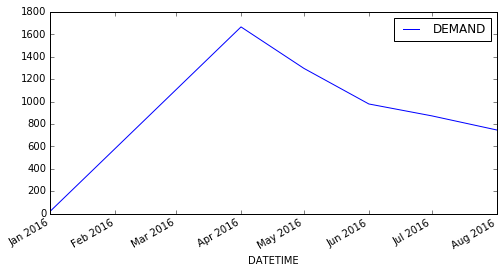

In [24]:
df_sorted.plot(x='DATETIME', y='DEMAND',figsize=figsize)

### Datetime Index

Starting from this section, we will use another example data (Airline Passenger) which covers a greater range of time to demostrate how to manipulate time series index.

In [25]:
data = 'international-airline-passengers.csv'
dft = pd.read_csv(data)
dft.columns = ['MONTH','PSG/K']
dft = dft.drop(dft.shape[0]-1) # Drop unuseful string data in last row
dft.index = pd.to_datetime(dft['MONTH']) # Set df index to time series

In [26]:
dft.head(5)

,MONTH,PSG/K
MONTH,,
1949-01-01,1949-01,112.0
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0


In [27]:
dft.ix[0] # 'MONTH' in first row of index does not affect dataframe shape, original shape remains

MONTH    1949-01
PSG/K        112
Name: 1949-01-01 00:00:00, dtype: object

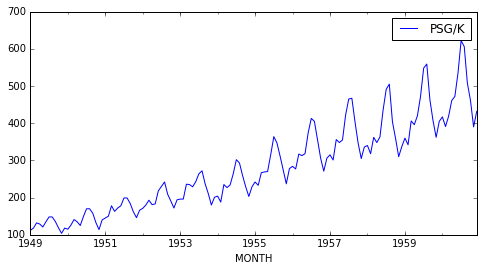

In [28]:
dft.plot(x=dft.index,y='PSG/K',figsize=figsize)

### Datetime Slicing

In [29]:
dft['1953'].head(5)

,MONTH,PSG/K
MONTH,,
1953-01-01,1953-01,196.0
1953-02-01,1953-02,196.0
1953-03-01,1953-03,236.0
1953-04-01,1953-04,235.0
1953-05-01,1953-05,229.0


In [30]:
dft['1953-01':'1953-05']

,MONTH,PSG/K
MONTH,,
1953-01-01,1953-01,196.0
1953-02-01,1953-02,196.0
1953-03-01,1953-03,236.0
1953-04-01,1953-04,235.0
1953-05-01,1953-05,229.0


In [31]:
dft.truncate(before='1949-02-01',after='1949-05-01')

,MONTH,PSG/K
MONTH,,
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0


### Offset Alias - Frequency

More about offset: [Link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

    Alias / Description
    B     business day frequency
    C     custom business day frequency (experimental)
    D     calendar day frequency
    W     weekly frequency
    M     month end frequency
    SM    semi-month end frequency (15th and end of month)
    BM    business month end frequency
    CBM   custom business month end frequency
    MS    month start frequency
    SMS   semi-month start frequency (1st and 15th)
    BMS   business month start frequency
    CBMS  custom business month start frequency
    Q     quarter end frequency
    BQ    business quarter endfrequency
    QS    quarter start frequency
    BQS   business quarter start frequency
    A     year end frequency
    BA    business year end frequency
    AS    year start frequency
    BAS   business year start frequency
    BH    business hour frequency
    H     hourly frequency
    T,min minutely frequency
    S     secondly frequency
    L,ms  milliseconds
    U,us  microseconds
    N     nanoseconds

### Shift datetime

In [32]:
ts = dft[:6]
ts

,MONTH,PSG/K
MONTH,,
1949-01-01,1949-01,112.0
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0
1949-06-01,1949-06,135.0


In [33]:
ts.shift(1,freq='MS') # if freq is not passed, dataframe is not aligned

,MONTH,PSG/K
MONTH,,
1949-02-01,1949-01,112.0
1949-03-01,1949-02,118.0
1949-04-01,1949-03,132.0
1949-05-01,1949-04,129.0
1949-06-01,1949-05,121.0
1949-07-01,1949-06,135.0


In [34]:
ts.tshift(1,freq='M') # tshift() automaticly aligns the dataframe

,MONTH,PSG/K
MONTH,,
1949-01-31,1949-01,112.0
1949-02-28,1949-02,118.0
1949-03-31,1949-03,132.0
1949-04-30,1949-04,129.0
1949-05-31,1949-05,121.0
1949-06-30,1949-06,135.0


In [35]:
tss = dft[:6].drop('MONTH',axis=1)
tss['PREVIOUS'] = tss['PSG/K'].shift(1)
tss

,PSG/K,PREVIOUS
MONTH,,
1949-01-01,112.0,NaN
1949-02-01,118.0,112.0
1949-03-01,132.0,118.0
1949-04-01,129.0,132.0
1949-05-01,121.0,129.0
1949-06-01,135.0,121.0


In [36]:
tss['CHANGE'] = ((tss['PSG/K'] - tss['PREVIOUS'])/tss['PSG/K'])
tss

,PSG/K,PREVIOUS,CHANGE
MONTH,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,112.0,0.050847
1949-03-01,132.0,118.0,0.106061
1949-04-01,129.0,132.0,-0.023256
1949-05-01,121.0,129.0,-0.066116
1949-06-01,135.0,121.0,0.103704


More about `shift()` and `tshift()`: [Link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging)

### Converting Frequency

`df.asfreq()` is the main method for frequency conversion, use `method='pad'` or `method='bfill'` to automaticlly fillin missing data section. 

More about `fillna()` method: [Link](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna)
    
    Method / Action
    pad / ffill        Fill values forward
    bfill / backfill   Fill values backward

In [37]:
ts = dft[:6]
ts

,MONTH,PSG/K
MONTH,,
1949-01-01,1949-01,112.0
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0
1949-06-01,1949-06,135.0


In [38]:
ts[:3].asfreq(freq='W',method='pad') # If method is not passed, missing data section will be filled with NAN

,MONTH,PSG/K
MONTH,,
1949-01-02,1949-01,112.0
1949-01-09,1949-01,112.0
1949-01-16,1949-01,112.0
1949-01-23,1949-01,112.0
1949-01-30,1949-01,112.0
1949-02-06,1949-02,118.0
1949-02-13,1949-02,118.0
1949-02-20,1949-02,118.0
1949-02-27,1949-02,118.0


### Converting Frequency - Resampling

`.resample()` is a time-based groupby, followed by a reduction method on each of its groups.

In [39]:
ts

,MONTH,PSG/K
MONTH,,
1949-01-01,1949-01,112.0
1949-02-01,1949-02,118.0
1949-03-01,1949-03,132.0
1949-04-01,1949-04,129.0
1949-05-01,1949-05,121.0
1949-06-01,1949-06,135.0


#### Down-sampling

Any function available via [`groupby`-dispatching](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby-dispatch) can be passed as `.function()` after the `Series` object to produce the value of the new dataframe. A list of them as blow:

    Func / Description
    bfill   Backward fill
    count   Count of values
    ffill   Forward fill
    first   First valid data value
    last    Last valid data value
    max     Maximum data value
    mean    Mean of values in time range
    median  Median of values in time range
    min     Minimum data value
    nunique Number of unique values
    ohlc    Opening value, highest value, lowest value, closing value
    pad     Same as forward fill
    std     Standard deviation of values
    sum     Sum of values
    var     Variance of values

In [40]:
ts.resample('Q').sum()

,PSG/K
MONTH,
1949-03-31,362.0
1949-06-30,385.0


In [41]:
ts.resample('QS').mean()

,PSG/K
MONTH,
1949-01-01,120.666667
1949-04-01,128.333333


`closed='left'/'right'` controls the end of the interval in on the left or right

In [42]:
ts.resample('QS',closed='right').mean()

,PSG/K
MONTH,
1948-10-01,112.000000
1949-01-01,126.333333
1949-04-01,128.000000


Parameters like `label` and `loffset` are used to manipulate the resulting labels. `label` specifies whether the result is labeled with the beginning or the end of the interval. `loffset` performs a time adjustment on the output labels.

More about `.resample()`: [Link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling)

In [43]:
ts.resample('QS',label='left',loffset='5D').mean()

,PSG/K
MONTH,
1949-01-06,120.666667
1949-04-06,128.333333


In [44]:
ts.resample('QS',label='right',loffset='5D').mean()

,PSG/K
MONTH,
1949-04-06,120.666667
1949-07-06,128.333333


#### Up-sampling

In [45]:
_ts = ts[:3].drop('MONTH',axis=1) # Get rid of the original 'MONTH' column in string format
_ts

,PSG/K
MONTH,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0


In [46]:
_ts.resample('W').ffill(limit=2)

,PSG/K
MONTH,
1949-01-02,112.0
1949-01-09,112.0
1949-01-16,NaN
1949-01-23,NaN
1949-01-30,NaN
1949-02-06,118.0
1949-02-13,118.0
1949-02-20,NaN
1949-02-27,NaN


A `Series` object can applied with all kinds of functions using `.apply(func)`

In [47]:
_ts.resample('W').pad().apply(lambda x: x/7) # .pad() is the same to .ffill(), it fills empty sections with previous value

,PSG/K
MONTH,
1949-01-02,16.000000
1949-01-09,16.000000
1949-01-16,16.000000
1949-01-23,16.000000
1949-01-30,16.000000
1949-02-06,16.857143
1949-02-13,16.857143
1949-02-20,16.857143
1949-02-27,16.857143


A more fancy way of dealing with missing values is `.interpolate()`. By default, `.interpolate()` applies `.interpolate(method='linear')`, filling in the missing data points in a linear way. Similar to `ffill()`, `limit=n` can be passed as well to control how many values you want to fill in.

More advanced methods such as `barycentric`, `pchip`, `akima`, `spline`, `quadratic`, `cubic`, `polynomial` can be choosen accordingly. (For `spline` and `polynomial` order the degree must be specified).

More about `.interpolate()`: 

* [Pandas `.interpolate()`](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#interpolation)
* [Scipy interpolation methods](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

In [48]:
_ts.resample('D').interpolate().head(5)

,PSG/K
MONTH,
1949-01-01,112.000000
1949-01-02,112.193548
1949-01-03,112.387097
1949-01-04,112.580645
1949-01-05,112.774194


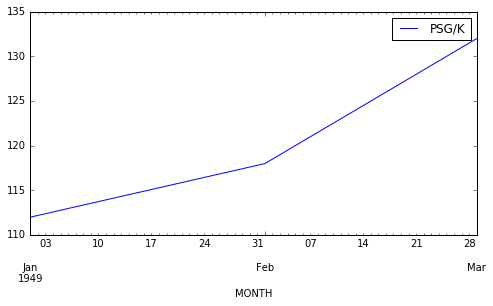

In [49]:
_ts.resample('D').interpolate().plot(figsize=figsize)

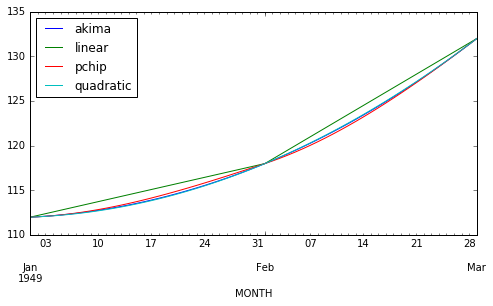

In [50]:
methods = ['linear', 'quadratic', 'akima', 'pchip']
_df = pd.DataFrame({m: _ts.resample('D').interpolate(method=m)['PSG/K'] for m in methods})
_df.plot(figsize=figsize)

### Other

#### Dataframe stores python objects

Pandas dataframe can store python objects as well, which can be convenient for further usage. 

data = [[[1,2,3]],
        [[1,2,3]]]

df_obj = pd.DataFrame(data=data,columns=['List Object'])
df_obj

type(df_obj.ix[0,0])

In [51]:
data = [[[1,2,3]], [[1,2,3]]]
df_obj = pd.DataFrame(data=data,columns=['List Object'])
df_obj

,List Object
0,"[1, 2, 3]"
1,"[1, 2, 3]"


In [52]:
type(df_obj.ix[0,0])

list